In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johncapocyan/cellnet-beta-version")

print("Path to dataset files:", path)

100%|██████████| 9.68G/9.68G [07:41<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/johncapocyan/cellnet-beta-version/versions/2


In [ ]:
import os
import shutil
mask_dir = '/content/drive/MyDrive/CellNet_masks/Colon_Benign'
image_dir = '/content/cellnet-dataset/CellNet/CellNet/Colon_Benign'
output_dir = '/content/SPLIT_IMAGES/Colon_Benign'
os.makedirs(output_dir, exist_ok=True)
mask_files = [f for f in os.listdir(mask_dir) if f.endswith('_mask.png')]
base_names = [f.replace('_mask.png', '') for f in mask_files]

copied = 0

for base_name in base_names:
    possible_exts = ['.jpeg', '.jpg', '.png']
    found = False
    for ext in possible_exts:
        fname = base_name + ext
        src_path = os.path.join(image_dir, fname)
        if os.path.exists(src_path):
            dst_path = os.path.join(output_dir, fname)
            shutil.copy2(src_path, dst_path)
            copied += 1
            found = True
            break
    if not found:
        print(f"⚠️ not find: {fname}")

print(f"\n✅ number: {copied} → {output_dir}")



✅ number: 400 → /content/SPLIT_IMAGES/Colon_Benign


In [ ]:
import os
import shutil
mask_dir = '/content/drive/MyDrive/CellNet_masks/Colon_Adenocarcinoma'
image_dir = '/content/cellnet-dataset/CellNet/CellNet/Colon_Adenocarcinoma'
output_dir = '/content/SPLIT_IMAGES/Colon_Adenocarcinoma'
os.makedirs(output_dir, exist_ok=True)
mask_files = [f for f in os.listdir(mask_dir) if f.endswith('_mask.png')]
base_names = [f.replace('_mask.png', '') for f in mask_files]

copied = 0

for base_name in base_names:
    possible_exts = ['.jpeg', '.jpg', '.png']
    found = False
    for ext in possible_exts:
        fname = base_name + ext
        src_path = os.path.join(image_dir, fname)
        if os.path.exists(src_path):
            dst_path = os.path.join(output_dir, fname)
            shutil.copy2(src_path, dst_path)
            copied += 1
            found = True
            break
    if not found:
        print(f"⚠️ not find: {fname}")

print(f"\n✅ number: {copied} → {output_dir}")



✅ number: 400 → /content/SPLIT_IMAGES/Colon_Adenocarcinoma


In [ ]:
import os
import shutil
mask_base_dir = '/content/drive/MyDrive/CellNet_masks'
image_source_dirs = {
    'Colon_Benign': '/content/cellnet-dataset/CellNet/CellNet/Colon_Benign',
    'Colon_Adenocarcinoma': '/content/cellnet-dataset/CellNet/CellNet/Colon_Adenocarcinoma'
}
output_base_dir = '/content/SPLIT_IMAGES'
os.makedirs(output_base_dir, exist_ok=True)

total_copied = 0

for label in ['Colon_Benign', 'Colon_Adenocarcinoma']:
    mask_dir = os.path.join(mask_base_dir, label)
    src_img_dir = image_source_dirs[label]
    out_dir = os.path.join(output_base_dir, label)
    os.makedirs(out_dir, exist_ok=True)

    mask_files = [f for f in os.listdir(mask_dir) if f.endswith('_mask.png')]
    original_filenames = [f.replace('_mask', '') for f in mask_files]

    copied = 0
    for fname in original_filenames:
        src_path = os.path.join(src_img_dir, fname)


In [ ]:
import shutil
dest_path = "/content/cellnet-dataset"
shutil.copytree(path, dest_path)
print("Dataset moved to:", dest_path)

Dataset moved to: /content/cellnet-dataset


In [ ]:
import os
import shutil
main_dir = "/content"
folders_to_delete = ['CellNet_masks']
for folder_name in folders_to_delete:
    folder_path = os.path.join(main_dir, folder_name)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"{folder_name} ok")
    else:
        print(f"{folder_name} dont be ok")

CellNet_masks ok


In [ ]:
import os
import shutil
main_dir = "/content/CellNet_masks"
folders_to_delete = ['Colon_Adenocarcinoma']
for folder_name in folders_to_delete:
    folder_path = os.path.join(main_dir, folder_name)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"{folder_name} ok")
    else:
        print(f"{folder_name} dont be ok")

Colon_Adenocarcinoma ok


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


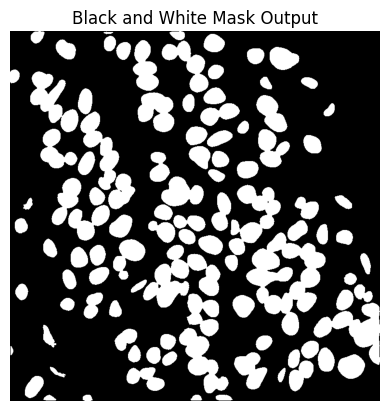

In [ ]:
from cellpose import models
from skimage import io as skio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imsave
img = skio.imread('/content/colonca1.jpeg')[:, :, :3]
model = models.CellposeModel(gpu=True, model_type='cyto')
masks, flows, styles = model.eval(img, diameter=None, channels=[0, 0])
bw_mask = (masks > 0).astype(np.uint8) * 255
imsave('/content/mask_bw.png', bw_mask)
mask_flat = masks.flatten()
indices = np.arange(mask_flat.size)
df = pd.DataFrame({'pixel_index': indices, 'mask_label': mask_flat})
csv_path = '/content/mask_data.csv'
df.to_csv(csv_path, index=False)
plt.imshow(bw_mask, cmap='gray')
plt.title("Black and White Mask Output")
plt.axis('off')
plt.show()
